In [165]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from scipy.stats import ttest_ind
import warnings 
warnings.simplefilter('ignore')

sns.set(style="whitegrid", color_codes=True)
sns.set_palette("Set2")
%matplotlib inline

os.chdir(r'D:\PERSONAL DATA\EXTRA CASE STUDIES')

In [44]:
df = pd.read_excel(r'Corona Data.xlsx')
df.head()

,Country,Total Cases,Total Deaths,Total Recovered,Death Rate,Recovery Rate,Death Rate Tot,Recovery Rate Tot,Avg. Temp Feb 2020
0,Singapore,106,NaN,74.0,NaN,100.0,NaN,69.811321,28
1,Malaysia,29,NaN,22.0,NaN,100.0,NaN,75.862069,27
2,Germany,130,NaN,16.0,NaN,100.0,NaN,12.307692,0
3,Vietnam,16,NaN,16.0,NaN,100.0,NaN,100.000000,15
4,U.K.,36,NaN,8.0,NaN,100.0,NaN,22.222222,4


In [45]:
#df1 = pd.read_csv(r'covid_19_clean_complete.csv')
#df1.head()


In [46]:
df = df.fillna(0)
df.head()

,Country,Total Cases,Total Deaths,Total Recovered,Death Rate,Recovery Rate,Death Rate Tot,Recovery Rate Tot,Avg. Temp Feb 2020
0,Singapore,106,0.0,74.0,0.0,100.0,0.0,69.811321,28
1,Malaysia,29,0.0,22.0,0.0,100.0,0.0,75.862069,27
2,Germany,130,0.0,16.0,0.0,100.0,0.0,12.307692,0
3,Vietnam,16,0.0,16.0,0.0,100.0,0.0,100.000000,15
4,U.K.,36,0.0,8.0,0.0,100.0,0.0,22.222222,4


In [47]:
df['Active Cases'] = df['Total Cases'] - df['Total Recovered'] - df['Total Deaths']

In [48]:
df['Active Cases Per'] = 100*(df['Active Cases']/df['Total Cases'])

In [49]:
df.head()

,Country,Total Cases,Total Deaths,Total Recovered,Death Rate,Recovery Rate,Death Rate Tot,Recovery Rate Tot,Avg. Temp Feb 2020,Active Cases,Active Cases Per
0,Singapore,106,0.0,74.0,0.0,100.0,0.0,69.811321,28,32.0,30.188679
1,Malaysia,29,0.0,22.0,0.0,100.0,0.0,75.862069,27,7.0,24.137931
2,Germany,130,0.0,16.0,0.0,100.0,0.0,12.307692,0,114.0,87.692308
3,Vietnam,16,0.0,16.0,0.0,100.0,0.0,100.000000,15,0.0,0.000000
4,U.K.,36,0.0,8.0,0.0,100.0,0.0,22.222222,4,28.0,77.777778


In [50]:
df2 = df[['Country','Recovery Rate Tot', 'Death Rate Tot', 'Active Cases Per']]

In [51]:
df2['Temperature'] = df['Avg. Temp Feb 2020']

c:\users\gaurav.das\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [52]:
df2.head()

,Country,Recovery Rate Tot,Death Rate Tot,Active Cases Per,Temperature
0,Singapore,69.811321,0.0,30.188679,28
1,Malaysia,75.862069,0.0,24.137931,27
2,Germany,12.307692,0.0,87.692308,0
3,Vietnam,100.000000,0.0,0.000000,15
4,U.K.,22.222222,0.0,77.777778,4


In [54]:
df3 = df2.sort_values(by = ['Temperature'], ascending = True)
df3.head()

,Country,Recovery Rate Tot,Death Rate Tot,Active Cases Per,Temperature
10,Russia,100.000000,0.0,0.000000,-10
13,Finland,16.666667,0.0,83.333333,-7
61,Estonia,0.000000,0.0,100.000000,-6
59,Belarus,0.000000,0.0,100.000000,-4
39,Sweden,0.000000,0.0,100.000000,-3


In [96]:
bars1 = df3['Active Cases Per']
bars2 = df3['Recovery Rate Tot']
bars3 = df3['Death Rate Tot']
bars = np.add(bars1, bars2).tolist()
r = np.arange(len(df3['Country']))

Sorted by average temperature of country


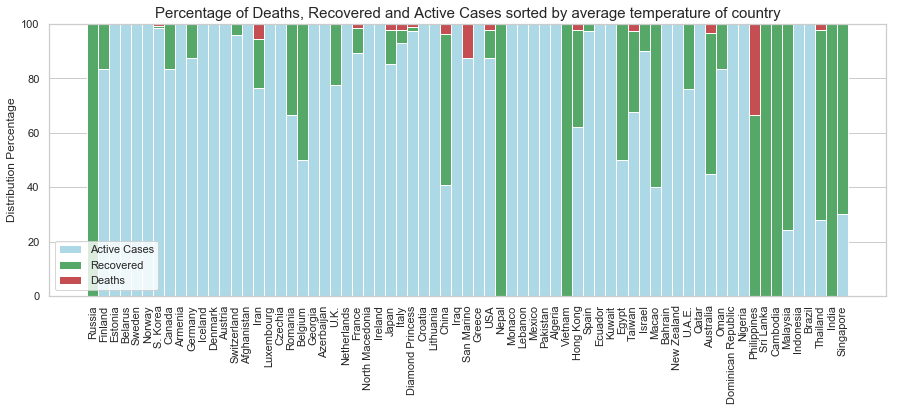

In [115]:
plt.figure(figsize=(15,5))
p1 = plt.bar(r, bars1, color='#ADD8E6', edgecolor='white', width=1)
p2 = plt.bar(r, bars2, bottom=bars1, color='g', edgecolor='white', width=1)
p3 = plt.bar(r, bars3, bottom=bars, color='r', edgecolor='white', width=1)

plt.ylabel('Distribution Percentage')
plt.title('Percentage of Deaths, Recovered and Active Cases sorted by average temperature of country', size = 15)
plt.xticks(con, df3['Country'])
plt.xticks(rotation=90)
plt.legend((p1[0], p2[0], p3[0]), ('Active Cases','Recovered', 'Deaths'), loc='lower left')
print('Sorted by average temperature of country')

Recovery Rate Vs Country


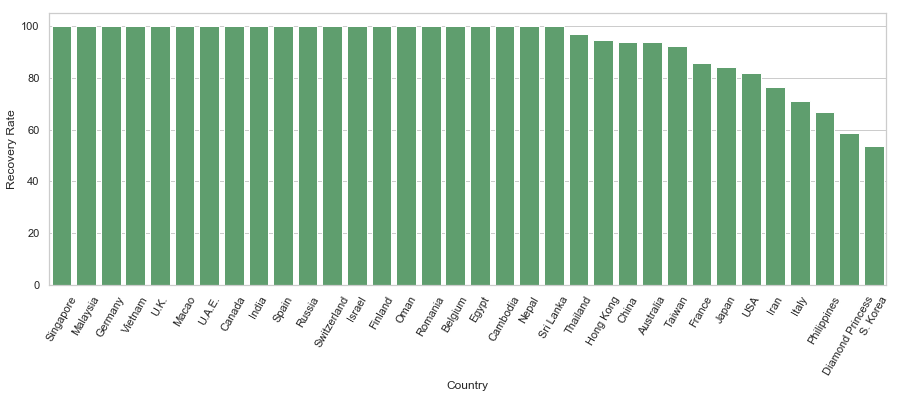

In [117]:
plt.figure(figsize=(15,5))
sns.barplot(x = df[df['Recovery Rate'] > 0]['Country'], y = df['Recovery Rate'], color='g')
plt.xticks(rotation=60)
print('Recovery Rate Vs Country')

Death Rate Vs Country


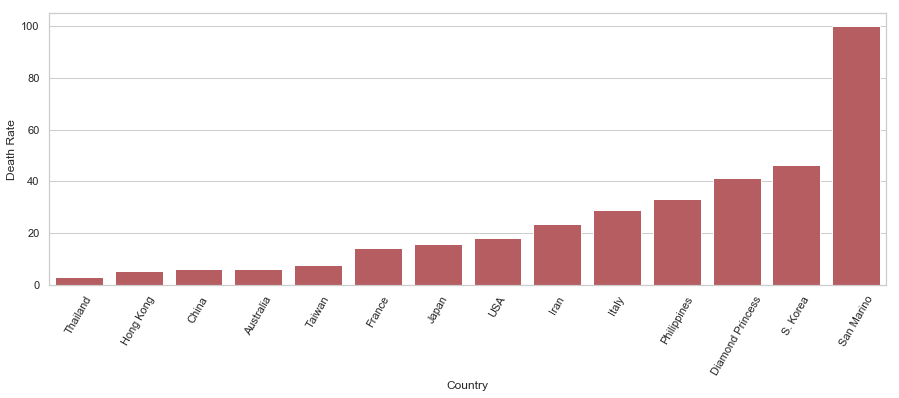

In [118]:
plt.figure(figsize=(15,5))
sns.barplot(x = df[df['Death Rate'] > 0]['Country'], y = df['Death Rate'], color='r')
plt.xticks(rotation=60)
print('Death Rate Vs Country')

Recovery Rate & Death Rate Vs Avg. Temperature


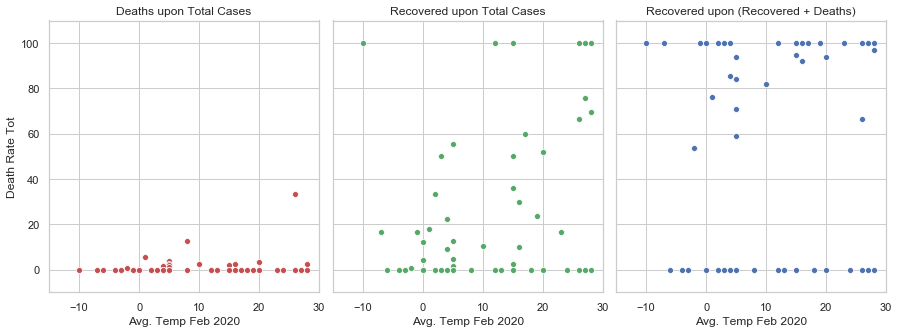

In [127]:
f, ax = plt.subplots(1, 3, sharey = True, figsize = (15,5))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.05, hspace=None)
ax[0].set_ylim(-10, 110)
ax[0].set_xlim(-15, 30), ax[1].set_xlim(-15, 30), ax[2].set_xlim(-15, 30)
ax[0].set_title("Deaths upon Total Cases"), ax[1].set_title("Recovered upon Total Cases"),ax[2].set_title("Recovered upon (Recovered + Deaths)")
sns.scatterplot(x=df['Avg. Temp Feb 2020'], y=df['Death Rate Tot'], color = 'r', ax = ax[0])
sns.scatterplot(x=df['Avg. Temp Feb 2020'], y=df['Recovery Rate Tot'], color = 'g', ax = ax[1])
sns.scatterplot(x=df['Avg. Temp Feb 2020'], y=df['Recovery Rate'], color = 'b', ax = ax[2])
print('Recovery Rate & Death Rate Vs Avg. Temperature')

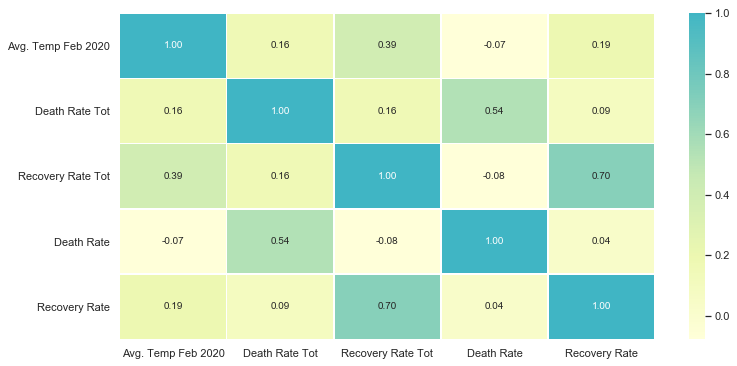

In [140]:
corr = df[['Avg. Temp Feb 2020', 'Death Rate Tot', 'Recovery Rate Tot', 'Death Rate', 'Recovery Rate']].corr()
plt.figure(figsize=(12, 6))
#plt.title('Pearson Correlation of attributes', y=1.05, size = 15)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
sns.heatmap(corr, cmap='YlGnBu', annot=True, linewidths=.5, fmt= '.2f', center = 1)#  mask = mask

In [172]:
def temp_thresh(feature, temperature):
    #global df_Temp
    temp = pd.DataFrame({'Status': 'Above', feature :df[df['Avg. Temp Feb 2020'] > temperature][feature]})
    temp = temp.append(pd.DataFrame({'Status': 'Below', feature:df[df['Avg. Temp Feb 2020'] <= temperature][feature]}))
    return temp

In [173]:
temp = temp_thresh('Recovery Rate Tot', 20)
temp['Status'].value_counts()

Below    57
Above    12
Name: Status, dtype: int64

In [174]:
temp.columns

Index(['Status', 'Recovery Rate Tot'], dtype='object')

In [175]:
df.columns

Index(['Country', 'Total Cases', 'Total Deaths', 'Total Recovered',
       'Death Rate', 'Recovery Rate', 'Death Rate Tot', 'Recovery Rate Tot',
       'Avg. Temp Feb 2020', 'Active Cases', 'Active Cases Per'],
      dtype='object')

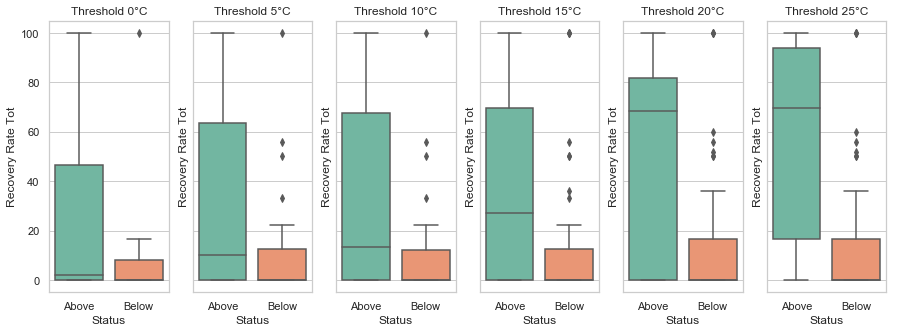

In [176]:
threshold = [0,5,10,15,20,25]

f, ax = plt.subplots(1, len(threshold), sharey=True, figsize = (15,5))
for i in range(len(threshold)):
    temp = temp_thresh('Recovery Rate Tot',threshold[i])
    ax[i].set_title("Threshold %d°C"%(threshold[i]))
    sns.boxplot(x = temp.Status, y = temp['Recovery Rate Tot'], ax = ax[i])

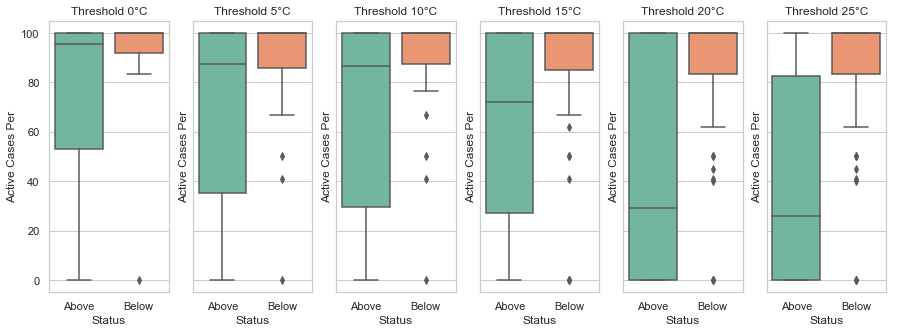

In [180]:
f, ax = plt.subplots(1, len(threshold), sharey=True, figsize = (15,5))
for i in range(len(threshold)):
    temp = temp_thresh('Active Cases Per',threshold[i])
    ax[i].set_title("Threshold %d°C"%(threshold[i]))
    sns.boxplot(x = temp.Status, y = temp['Active Cases Per'], ax = ax[i])